In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#Referenced: https://stackoverfloww.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations 
from collections import Counter

### Merging 12 months of sales in a single csv file

In [3]:
os.chdir('D:')

In [4]:
#df = pd.read_csv('D:\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data')
files = [file for file in os.listdir('D:\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('D:\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\'+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("another_data_analysis.csv", index = False )

### Read in updated dataframe

In [5]:
all_data = pd.read_csv('another_data_analysis.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Up the data a little

### Drop rows of Nan values

In [6]:
nan_df = all_data[all_data.isna().any(axis = 1)]

all_data = all_data.dropna(how = 'all')

#### Find 'Or' and delete it

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Convert Columns to correct data type

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])#Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Make Float

### Augent the data with additional columns

#### Task 2: Add Month Column

In [9]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a sales column

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data["Price Each"]
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a city column

In [11]:
#Let's use the .apply() method
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{ get_city(x)} ({get_state(x)})')

all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


### Question 1: What month was the best for sales? How much was earned that month?

In [12]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,21806,3623536.76,3644513.46
2,26898,4377769.44,4404044.84
3,34010,5582415.66,5614200.76
4,41116,6735342.04,6781340.48
5,37334,6270250.26,6305213.50
6,30506,5124051.22,5155604.52
7,32144,5265079.12,5295551.52
8,26896,4460690.84,4488935.76
9,26218,4169984.18,4195120.26


Text(0.5, 0, 'Month Number')

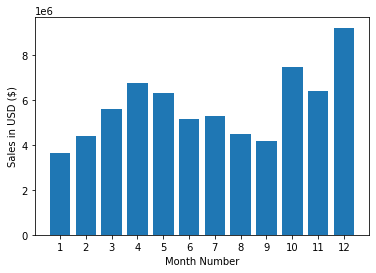

In [13]:
month = range(1,13)
results = all_data.groupby('Month').sum()
plt.bar(month, results['Sales'])
plt.xticks(month)
plt.ylabel('Sales in USD ($)')
plt.xlabel("Month Number")

### Question 2:  What US city had the highest number of sales?

In [14]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),33204,5559816.40,209588,5590997.16
Austin (TX),22306,3619747.22,139658,3639163.50
Boston (MA),45056,7274819.54,282224,7323284.02
Dallas (TX),33460,5505255.64,209240,5535950.80
Los Angeles (CA),66578,10842870.46,416650,10905141.60
New York City (NY),55864,9270741.66,351482,9328634.86
Portland (ME),5500,894378.50,34288,899516.54
Portland (OR),22606,3721116.44,141242,3741464.68
San Francisco (CA),100478,16422923.48,631040,16524407.82


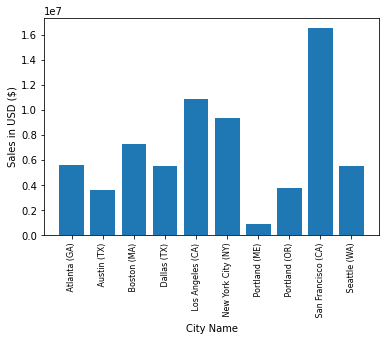

In [15]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel("City Name")
plt.show()

### Question 3: What time should we display advertisements to maximize the likelihood of customers buying  products?

In [24]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [30]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


InvalidIndexError: (slice(None, None, None), None)

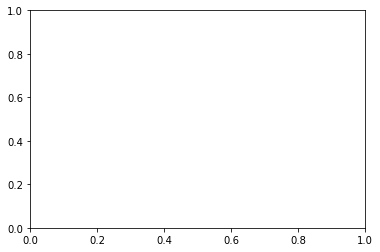

In [29]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

### Question 4: What products were most often ordered together?

In [38]:
df = all_data[all_data['Order ID'].duplicated (keep= False)]
df ['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable"
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones"
6,176562,"USB-C Charging Cable,USB-C Charging Cable"


In [43]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for k,v in count.most_common(10):
    print(k,v)

('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6250


### Question 5: What product sold the most? Why do you think it sold the most?

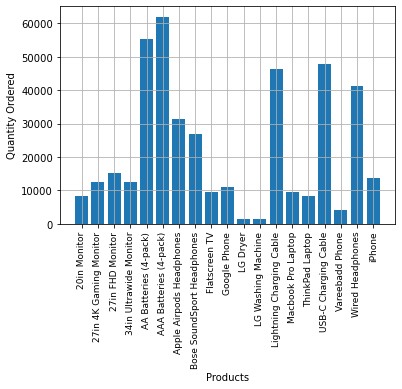

In [48]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation= 'vertical', size = 9)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.grid()
plt.show()

C:\Users\Alozie Daberechi\AppData\Local\Temp\ipykernel_10712\391471950.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 9)


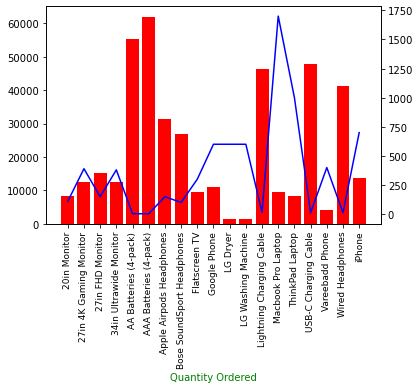

In [64]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color ='r')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_xlabel('Quantity Ordered', color = 'g')
ax2.set_xlabel('Price($)', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 9)
plt.show()